In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In the code below:
-	Some ideas on how to fill the age variable
-	Some ideas on how to use the Name variable to extract Title
-	Perhaps drop Sibsp and Parch, but use the family size variable which is derived from them 
- Possible outlier in Fare column...

Other points:
-	We can put age into bands or keep as continuous variable?
-	There is some information online about how to use the cabin variable. Cabin is only available for those in upper classes so it would only really give us more information on part of the data. I don’t think it adds anything to the research and removing it can be easily justified as it has a lot of missingness
-	From coursework description: *If some of your data-columns are discrete, you need to describe how you will represent these in your data-matrix. Categorical values (for more than 2 categories) are typically best represented as one-hot vectors (why?), while ordinal values can be represented by their rank.*

o	Class can remain as 1, 2, 3 but Embarked, Sex and Title should be one-hot vectors?
-	From coursework description: *In general, you might consider also reporting some statistics or visualisations on the dataset of your choosing which you consider particularly relevant to the performance of your algorithm.*

o	So perhaps we can fit our models before deciding which visualisations are particularly relevant to include in the report
-	From reading the information on Kaggle, my understanding is that the gender_submission.csv file is not the solutions. It is an example of what a submission file should look like where they have just put all females as survived and males as not survived. So we’re probably going to have to just use the train data.
- From coursework description it looks like we have to have each of our models in an independent function similar to the way that it is done in the tutorials.
- Put together a function to split the data into train/test and each use this for out models so that we are using the same train/test split for comparison
- Overleaf...



In [4]:
#Read in all columns except PassengerId, Ticket and Cabin 
train = pd.read_csv('/content/drive/MyDrive/INST/train.csv', usecols=['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [5]:
#Convert Sex to a numeric variable
for i in range(len(train)):
  if train.loc[i, 'Sex'] == 'male':
    train.loc[i, 'Sex'] = 1
  else:
    train.loc[i, 'Sex'] = 0

train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C


In [6]:
#convert Embarked to a numeric variable 
for i in range(len(train)):
  if train.loc[i, 'Embarked'] == 'C':
    train.loc[i, 'Embarked'] = 1
  elif train.loc[i, 'Embarked'] == 'Q':
    train.loc[i, 'Embarked'] = 2
  else:
    train.loc[i, 'Embarked'] = 3

train


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,3
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,3
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,3
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,3
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,1


In [19]:
#How many age rows are missing 
age_nan_n = train['Age'].isnull().sum()
age_nan_n

177

In [7]:
#There are 177 rows with missing age
#replace missing age with mean age
#len counts the number of rows so we want to divide by the number of peoples whose age we are counting
avg_age = train['Age'].sum()/(len(train)-177)
train = train.fillna(value=avg_age)

In [21]:
#other options for filling missing age variable:

#this example goes through using the median age for each Parch and SibSP category
#https://www.kaggle.com/angps95/basic-classification-methods-for-titanic
#it also has a possible way to include the cabin variable

#Can simply take mean for males and females separately
#made a start but it didn't work
train_m = train[train["Sex"] == 1]
avg_age_m = train_m['Age'].sum()/len(train_m)

train_f = train[train["Sex"] == 0]
avg_age_f = train_m['Age'].sum()/len(train_f)

for i in range(len(train)):
  if train.loc[i, 'Sex'] == 1:
    train['Age'].fillna(value=avg_age_m)
  else:
    train['Age'].fillna(value=avg_age_f)

In [8]:
#Check that we no longer have missing rows
age_nan_n = train['Age'].isnull().sum()
age_nan_n

0

In [9]:
#Creating new family_size column
train['Family_Size']=train['SibSp']+train['Parch']


In [24]:
#Calculate the fare per person
#Found this online but not sure if it is correct as, for this to work, we have to assume that the Fare for families is recorded as the sum of their tickets
train['Fare_pp'] = train['Fare']/(train['Family_Size']+1)
train['Fare_pp'] = train['Fare_pp'].astype(int)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Age*Class,Fare_pp
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,7.2500,3,1,66.000000,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,71.2833,1,1,38.000000,35
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,7.9250,3,0,78.000000,7
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,53.1000,3,1,35.000000,26
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,8.0500,3,0,105.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,13.0000,3,0,54.000000,13
887,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,30.0000,3,0,19.000000,30
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,23.4500,3,3,89.097353,5
889,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,30.0000,1,0,26.000000,30


In [10]:
#Extract some information from the Name variable
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Rare": 4}

# extract titles
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
   # replace titles with a more common title or as Rare
train['Title'] = train['Title'].replace(['Lady', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace(['Capt','Major', 'Rev', 'Sir'], 'Mr')

train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace(['Mme', 'Countess'], 'Mrs')
    # convert titles into numbers
train['Title'] = train['Title'].map(titles)
    # filling NaN with 0, to get safe
train['Title'] = train['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title
0,0,3,1,22.000000,1,0,7.2500,3,1,1.0
1,1,1,0,38.000000,1,0,71.2833,1,1,3.0
2,1,3,0,26.000000,0,0,7.9250,3,0,2.0
3,1,1,0,35.000000,1,0,53.1000,3,1,3.0
4,0,3,1,35.000000,0,0,8.0500,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,3,0,4.0
887,1,1,0,19.000000,0,0,30.0000,3,0,2.0
888,0,3,0,29.699118,1,2,23.4500,3,3,2.0
889,1,1,1,26.000000,0,0,30.0000,1,0,1.0


In [ ]:
#alternative way of grouping the names found online. I haven't run this yet.
#Can compare this to the above method to see which produces more interesting results

train.insert(value=train.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12,column="Title")
Test.insert(value=Test.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=11,column="Title")
#We then assign social status titles to them for more in-depth analysis.

title_map={"Capt": "Officer",
            "Col": "Officer",
            "Major": "Officer",
            "Jonkheer": "Royalty",
            "Don": "Royalty",
            "Sir" : "Royalty",
            "Dr": "Officer",
            "Rev": "Officer",
            "the Countess":"Royalty",
            "Dona": "Royalty",
            "Mme":  "Mrs",
            "Mlle": "Miss",
            "Ms": "Mrs",
            "Mr" : "Mr",
            "Mrs" : "Mrs",
            "Miss" : "Miss",
            "Master" : "Master",
            "Lady" : "Royalty"}
train["Title"]=train.Title.map(title_map)
Test["Title"]=Test.Title.map(title_map)

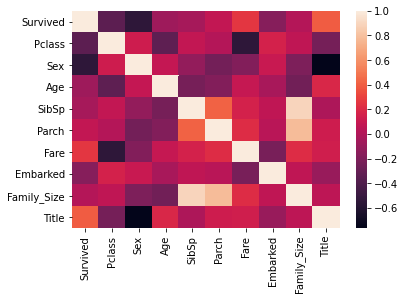

In [11]:
corr = train.corr()
ax = sns.heatmap(corr)
#it looks like there is a correlation betweeen:
# Survived and Sex
# survived and title
# survived and Pclasss
# Fare_pp and Pclass
# Fare and Pclass
# Age and Pclass
# Sex and Title - makes sense. So we either include Sex or Title in the model. Not both
# Sex and Parch?
# SibSp and Parch - not sure how to display this
# Fare and Embarked

In [ ]:
# #plotting everything in scatter plots doesn't show much as most variables are ordinal
sns.pairplot(train)

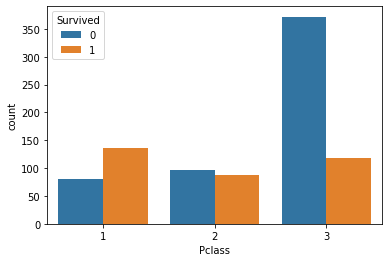

In [28]:
sns.countplot(x = 'Pclass', data = train, hue = "Survived")

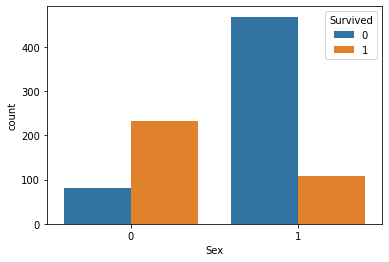

In [27]:
sns.countplot(x = 'Sex', data = train, hue = "Survived")

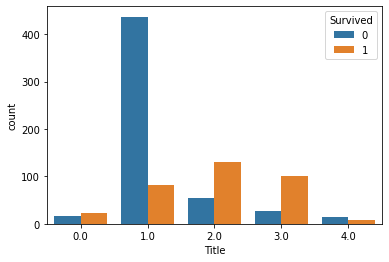

In [29]:
sns.countplot(x = 'Title', data = train, hue = "Survived")

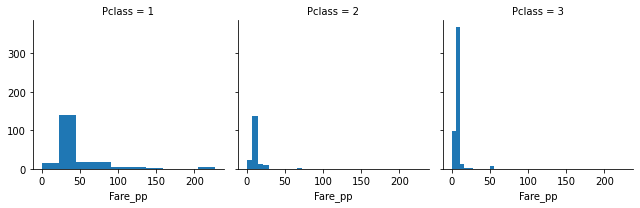

In [36]:
#Removed maximum value for Fare as it is around 500 which looks like an outlier
fare_p = sns.FacetGrid(train[train.Fare != max(train.Fare)], col='Pclass')
fare_p.map(plt.hist, 'Fare_pp')

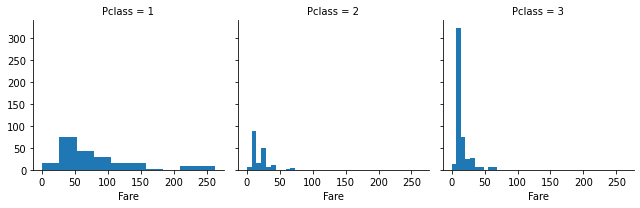

In [37]:
fare = sns.FacetGrid(train[train.Fare != max(train.Fare)], col='Pclass')
fare.map(plt.hist, 'Fare')
#It doesn't look like Fare_pp tells us anything more than Fare

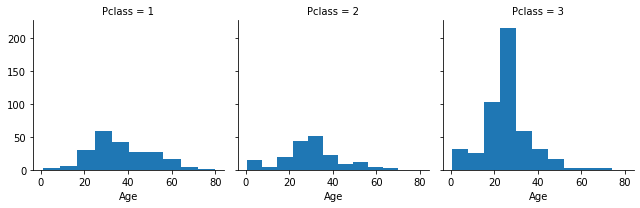

In [39]:
age_class = sns.FacetGrid(train, col='Pclass')
age_class.map(plt.hist, 'Age')

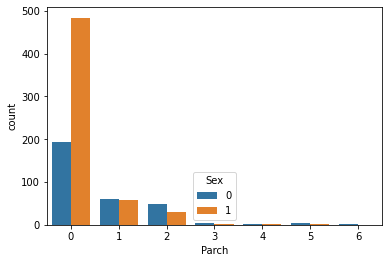

In [41]:
sns.countplot(x = 'Parch', data = train, hue = "Sex")

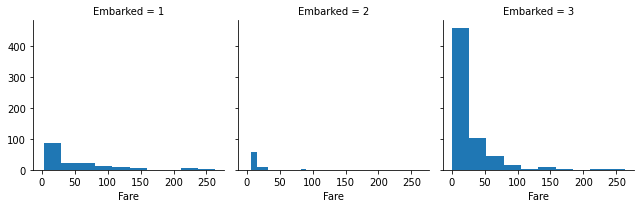

In [49]:
#Don't see anything interesting here
fare = sns.FacetGrid(train[train.Fare != max(train.Fare)], col='Embarked')
fare.map(plt.hist, 'Fare')

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

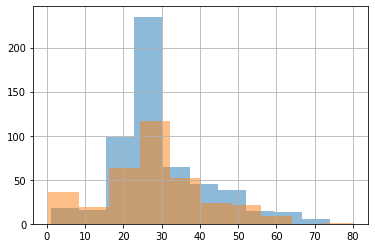

In [50]:
train["Age"].groupby(train["Survived"]).hist(alpha = 0.5)

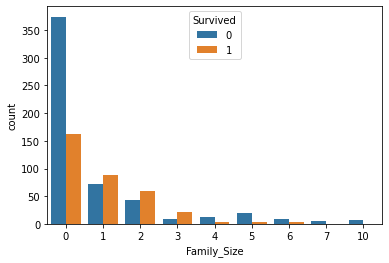

In [51]:
sns.countplot(x = 'Family_Size', data = train, hue = "Survived")

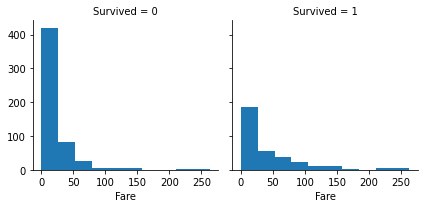

In [54]:
fare = sns.FacetGrid(train[train.Fare != max(train.Fare)], col='Survived')
fare.map(plt.hist, 'Fare')

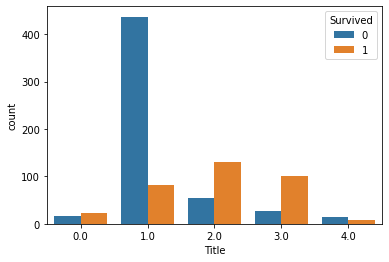

In [52]:
sns.countplot(x = 'Title', data = train, hue = "Survived")

In [13]:
train.to_csv("titanic_clean.csv", index=False)